## **Obiectiv**

Inca de mic, pasiunea mea pentru baschet s-a manifestat in multe ore petrecute urmarind meciuri de baschet atat la nivel national, in Romania, cat si la cel mai inalt nivel, in NBA. Polemicile si analizele amanuntite realizate la inceputul fiecarui sezon din NBA, asupra echipelor cu cele mai mari sanse la castigarea campionatului m-au determinat sa incerc sa determin cu ajutorul statisticilor echipa care va deveni campioana in actualul sezon 2021-2022.

## **Setul de date**

Setul de date pe care il voi folosi pentru analiza va fi compus dintr-un numar de statistici de sezon, ale fiecarei echipe din NBA, incepand din anul 1980, deoarece din acest an au inceput sa fie inregistrate statisticile avansate pentru echipe si pentru ca in acest an a fost introdusa linia de 3 puncte. Nu am reusit sa gasesc niciun set de date pe vreun site care sa corespunda necesitatilor mele asa ca am fost nevoit sa utilizez libraria BeautifulSoup pentru a putea extrage datele de pe site-ul https://www.basketball-reference.com/. Printre statisticile avansate pe care le-am extras se numara: 

*   MOV (Margin of Victory): aceasta statistica se refera la diferenta intre punctele marcate de echipa fata de oponenti
*   SOS (Strength of Schedule): se refera la calitatea oponentilor intalniti in timpul sezonului, fiind o statistica importanta intr-o liga in care echipele nu joaca intre ele acelasi numar de meciuri
*   SRS (Simple Rating System): *MOV - SOS => SRS*
*   ORtg (Offensive Rating): Numarul de puncte marcate per 100 de posesii
*   DRTG (Defensive Rating): Numarul de puncte marcate de oponenti per 100 de posesii impotriva echipei
*   eFG% (Effective Field Goal Percentage): Aceasta statistica tine cont de faptul ca o aruncare de 3 puncte este cu un punct mai valoroasa decat una de doua puncte. Pentru a ilustra aceasta statistica, avem urmatorul exemplu, presupunem ca jucatorul A marcheaza 4 din 10 aruncari, 2 dintre aceste aruncari marcate fiind de 3 puncte, in timp ce jucatorul B marcheaza 5 din 10 aruncari, fara sa marcheze de 3 puncte. Ambii jucatori ar avea un total de 10 puncte din aruncarile marcate si astfel ar avea acelasi eFG% (50%) , cu toate ca FG% lor difera.
* Playoff Wins: aceasta este coloana label si coloana pe care vom incerca sa o prezicem. Echipele cu 16 victorii in playoff sunt campioanele NBA, deoarece structura Playoff-ului in NBA este urmatoarea: 


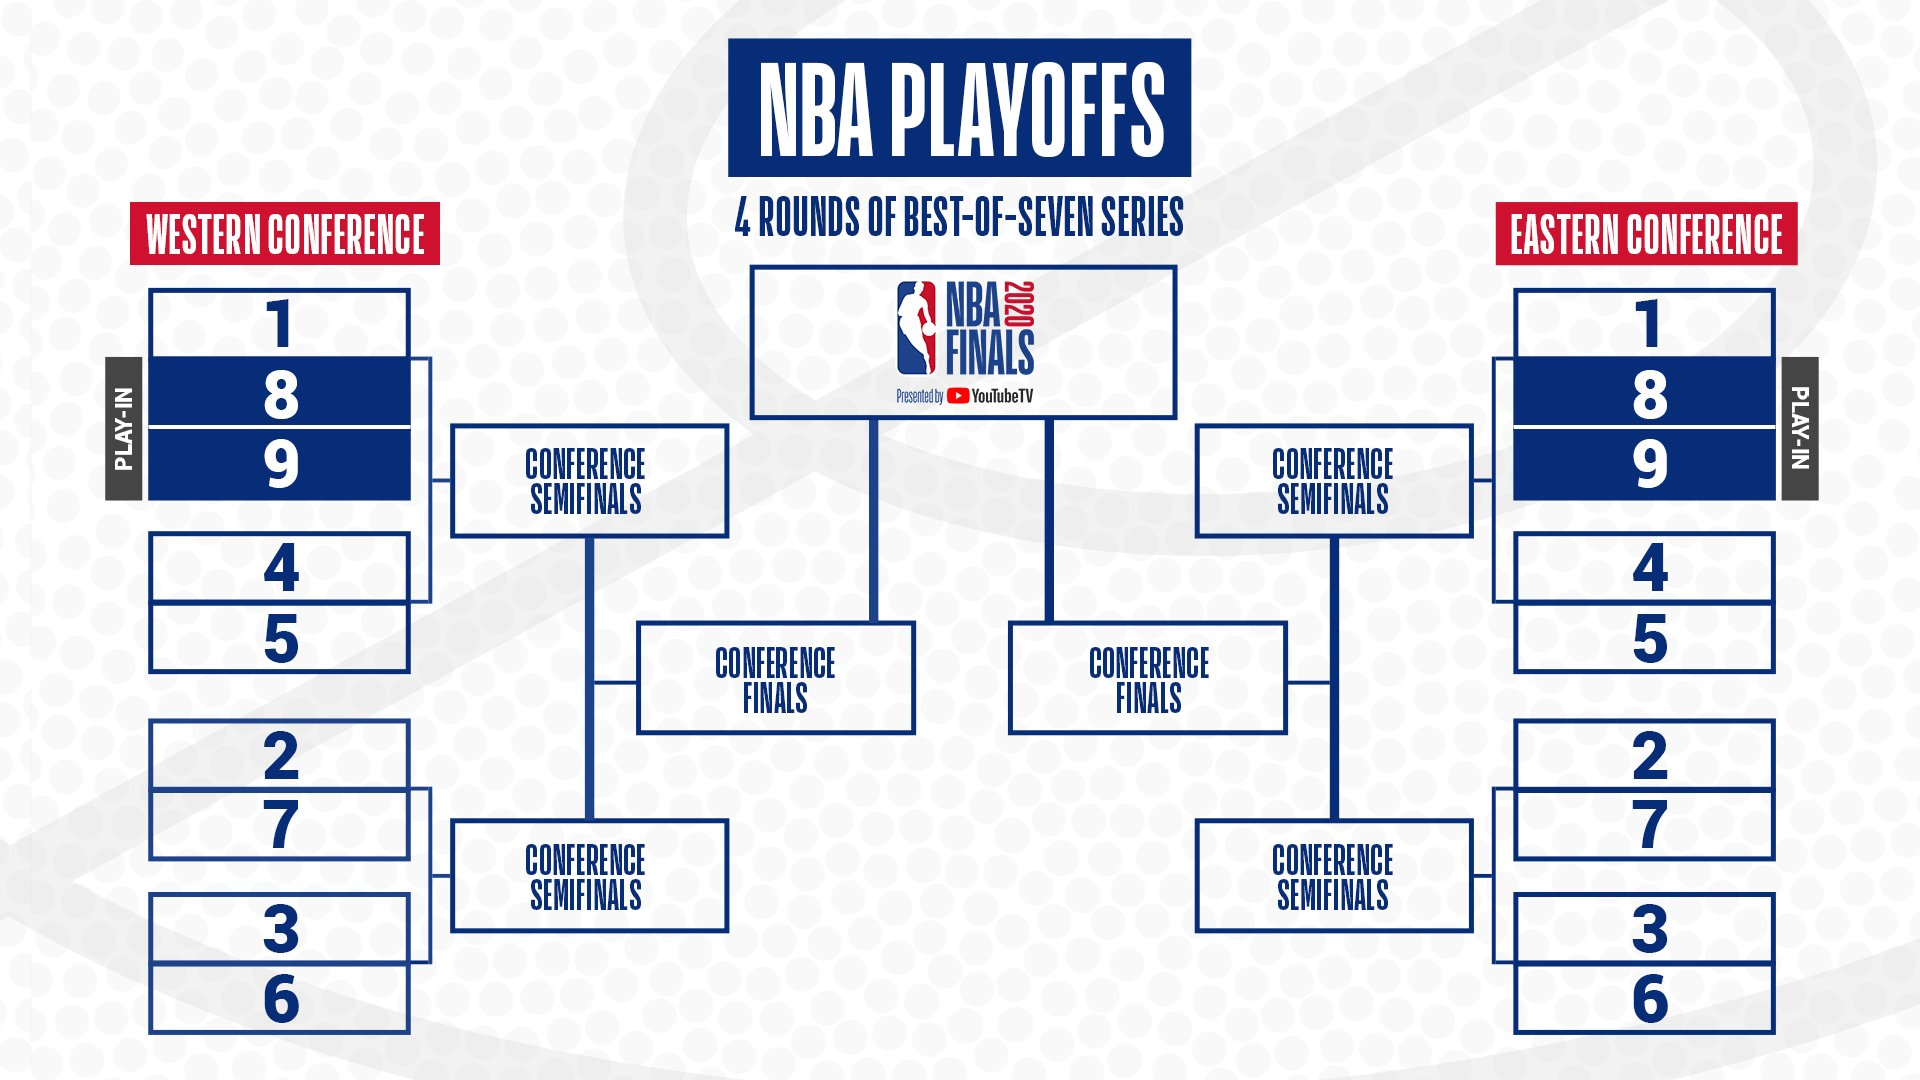

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Colectez datele de pe site-ul de mai jos si formez o lista de data frame-uri care o sa contina datele necesare pentru set-ul de antrenament
list_df = []
for i in range(1980, 2016): 
  url = 'https://www.basketball-reference.com/leagues/NBA_'+ str(i) + '.html'
  url_playoff = 'https://www.basketball-reference.com/playoffs/NBA_'+ str(i) + '.html'

  year = i
  df = pd.read_html(url)[8]
  total = pd.read_html(url)[4]

  for tup in df:
    tup = tup[1:]


  if i <= 1983:
    df_playoff = pd.read_html(url_playoff)[16]
  else:
    df_playoff = pd.read_html(url_playoff)[20]
  
  for tup in df_playoff:
    tup = tup[1:]

  if i >= 1998:
    df_playoff.rename(columns = {'Tm': 'Team'}, inplace = True)
  
  # df.drop([len(df.index) - 1], axis=0, inplace=True)
  # df_playoff.drop([len(df_playoff.index) - 1], axis=0, inplace=True)

  df_playoff.rename(columns = {'W': 'Playoff_Wins'}, inplace = True)

  df.drop([len(df.index) - 1], axis=0, inplace=True)
  df.columns = df.columns.get_level_values(1)
  df.loc[~df.index.duplicated(keep='first')]

  if 'Arena' in df.columns:
    df = df.drop('Arena', axis=1)

  if 'Attend.' in df.columns:
    df = df.drop('Attend.', axis=1)
    
  if 'Attend./G' in df.columns:
    df = df.drop('Attend./G', axis=1)

  df_playoff.drop([len(df_playoff.index) - 1], axis=0, inplace=True)
  df_playoff.columns = df_playoff.columns.get_level_values(1)
  df_playoff.loc[~df_playoff.index.duplicated(keep='first')]
  
  df['3P%'] = 0
  total.drop([len(total.index) - 1], axis=0, inplace=True)
  for i in range(0, len(total.index)):
    for j in range(0, len(df.index)):
      if df.at[j, 'Team'] == total.at[i, 'Team']:
        df.at[j, '3P%'] = total.at[i, '3P%']

  df['DRB'] = 0
  for i in range(0, len(total.index)):
    for j in range(0, len(df.index)):
      if df.at[j, 'Team'] == total.at[i, 'Team']:
        df.at[j, 'DRB'] = total.at[i, 'DRB']
  
  df['BLK'] = 0
  for i in range(0, len(total.index)):
    for j in range(0, len(df.index)):
      if df.at[j, 'Team'] == total.at[i, 'Team']:
        df.at[j, 'BLK'] = total.at[i, 'BLK']

  df['Playoff_Wins'] = 0

  for i in range(0, len(df_playoff.index)):
    for j in range(0, len(df.index)):
      if df.at[j, 'Team'].find('*') != -1:

        if df.at[j, 'Team'] == df_playoff.at[i, 'Team'] + '*':
          df.at[j, 'Playoff_Wins'] = df_playoff.at[i, 'Playoff_Wins']

  df['Year'] = year
  df = df.dropna(axis=1)
  list_df.append(df)

for i in range(2016, 2022): 
  url = 'https://www.basketball-reference.com/leagues/NBA_'+ str(i) + '.html'

  url_playoff = 'https://www.basketball-reference.com/playoffs/NBA_'+ str(i) + '.html'
  year = i

  df = pd.read_html(url)[10]
  df_playoff = pd.read_html(url_playoff)[20]
  total = pd.read_html(url)[6]

  for tup in df:
    tup = tup[1:]

  for tup in df_playoff:
    tup = tup[1:]
  
  df_playoff.rename(columns = {'Tm': 'Team'}, inplace = True)
  df_playoff.rename(columns = {'W': 'Playoff_Wins'}, inplace = True)

  df.drop([len(df.index) - 1], axis=0, inplace=True)
  df.columns = df.columns.get_level_values(1)
  df.loc[~df.index.duplicated(keep='first')]

  if 'Arena' in df.columns:
    df = df.drop('Arena', axis=1)

  if 'Attend.' in df.columns:
    df = df.drop('Attend.', axis=1)
    
  if 'Attend./G' in df.columns:
    df = df.drop('Attend./G', axis=1)

  df_playoff.drop([len(df_playoff.index) - 1], axis=0, inplace=True)
  df_playoff.columns = df_playoff.columns.get_level_values(1)
  df_playoff.loc[~df_playoff.index.duplicated(keep='first')]

  df['3P%'] = 0
  total.drop([len(total.index) - 1], axis=0, inplace=True)
  for i in range(0, len(total.index)):
    for j in range(0, len(df.index)):
      if df.at[j, 'Team'] == total.at[i, 'Team']:
        df.at[j, '3P%'] = total.at[i, '3P%']
  
  df['DRB'] = 0
  for i in range(0, len(total.index)):
    for j in range(0, len(df.index)):
      if df.at[j, 'Team'] == total.at[i, 'Team']:
        df.at[j, 'DRB'] = total.at[i, 'DRB']
  
  df['BLK'] = 0
  for i in range(0, len(total.index)):
    for j in range(0, len(df.index)):
      if df.at[j, 'Team'] == total.at[i, 'Team']:
        df.at[j, 'BLK'] = total.at[i, 'BLK']
  
  df['Playoff_Wins'] = 0

  for i in range(0, len(df_playoff.index)):
    for j in range(0, len(df.index)):
      if df.at[j, 'Team'].find('*') != -1:

        if df.at[j, 'Team'] == df_playoff.at[i, 'Team'] + '*':
          df.at[j, 'Playoff_Wins'] = df_playoff.at[i, 'Playoff_Wins']

  df['Year'] = year

  df = df.dropna(axis=1)
  list_df.append(df)

Datele vor fi salvate in fisiere *.csv* si utilizate ulterior cu ajutorul **PySpark**. Pentru setul de date de antrenament voi avea statisticile din 1980 pana in 2021, iar pentru cel de test, voi folosi statisticile din 2022.

In [4]:
list_df[0].to_csv('nba_stats_1980_2021.csv', mode='a', header=True)
for i in range(1, len(list_df)):
  list_df[i].to_csv('nba_stats_1980_2021.csv', mode='a', header=False)


In [5]:
# Colectez setul de date pe care o sa fac prediction ul 
url = 'https://www.basketball-reference.com/leagues/NBA_2022.html'

df_pred = pd.read_html(url)[10]
total = pd.read_html(url)[6]

for tup in df_pred:
    tup = tup[1:]

df_pred.drop([len(df_pred.index) - 1], axis=0, inplace=True)
df_pred.columns = df_pred.columns.get_level_values(1)
df_pred.loc[~df_pred.index.duplicated(keep='first')]

if 'Arena' in df_pred.columns:
  df_pred = df_pred.drop('Arena', axis=1)

if 'Attend.' in df_pred.columns:
  df_pred = df_pred.drop('Attend.', axis=1)
  
if 'Attend./G' in df_pred.columns:
  df_pred = df_pred.drop('Attend./G', axis=1)

df_pred['3P%'] = 0
total.drop([len(total.index) - 1], axis=0, inplace=True)
for i in range(0, len(total.index)):
  for j in range(0, len(df_pred.index)):
    if df_pred.at[j, 'Team'] == total.at[i, 'Team']:
      df_pred.at[j, '3P%'] = total.at[i, '3P%']

df_pred['DRB'] = 0
for i in range(0, len(total.index)):
  for j in range(0, len(df_pred.index)):
    if df_pred.at[j, 'Team'] == total.at[i, 'Team']:
      df_pred.at[j, 'DRB'] = total.at[i, 'DRB']

df_pred['BLK'] = 0
for i in range(0, len(total.index)):
  for j in range(0, len(df_pred.index)):
    if df_pred.at[j, 'Team'] == total.at[i, 'Team']:
      df_pred.at[j, 'BLK'] = total.at[i, 'BLK']

df_pred['Playoff_Wins'] = 0

df_pred['Year'] = 2022
df_pred = df_pred.dropna(axis=1)

print(df_pred)

      Rk                     Team   Age     W     L  PW  PL   MOV   SOS   SRS  \
0    1.0          Boston Celtics*  26.1  51.0  31.0  59  23  7.28 -0.26  7.02   
1    2.0            Phoenix Suns*  27.5  64.0  18.0  59  23  7.50 -0.56  6.94   
2    3.0               Utah Jazz*  29.3  49.0  33.0  56  26  6.04 -0.37  5.67   
3    4.0       Memphis Grizzlies*  24.0  56.0  26.0  55  27  5.68 -0.32  5.37   
4    5.0   Golden State Warriors*  27.6  53.0  29.0  55  27  5.54 -0.02  5.52   
5    6.0              Miami Heat*  28.2  53.0  29.0  53  29  4.45 -0.22  4.23   
6    7.0        Dallas Mavericks*  26.7  52.0  30.0  50  32  3.30 -0.18  3.12   
7    8.0         Milwaukee Bucks*  28.5  51.0  31.0  49  33  3.35 -0.14  3.22   
8    9.0      Philadelphia 76ers*  26.8  51.0  31.0  48  34  2.61 -0.04  2.57   
9   10.0  Minnesota Timberwolves*  24.2  46.0  36.0  48  34  2.63 -0.10  2.53   
10  11.0          Denver Nuggets*  27.7  48.0  34.0  47  35  2.30 -0.15  2.16   
11  12.0         Toronto Rap

In [13]:
df_pred.to_csv('nba_stats_2022.csv', mode='a', header=True)

In [6]:
print(list_df)

[      Rk                     Team   Age     W     L  PW  PL   MOV   SOS   SRS  \
0    1.0          Boston Celtics*  27.3  61.0  21.0  60  22  7.79 -0.42  7.37   
1    2.0      Los Angeles Lakers*  26.2  60.0  22.0  55  27  5.90 -0.51  5.40   
2    3.0     Seattle SuperSonics*  27.0  56.0  26.0  53  29  4.66 -0.42  4.24   
3    4.0      Philadelphia 76ers*  27.0  59.0  23.0  52  30  4.22 -0.18  4.04   
4    5.0         Milwaukee Bucks*  25.3  49.0  33.0  51  31  3.94 -0.37  3.57   
5    6.0            Phoenix Suns*  26.5  55.0  27.0  50  32  3.60 -0.35  3.25   
6    7.0       Kansas City Kings*  25.5  47.0  35.0  49  33  3.13 -0.32  2.82   
7    8.0           Atlanta Hawks*  26.1  50.0  32.0  49  33  2.91 -0.09  2.83   
8    9.0      Cleveland Cavaliers  27.4  37.0  45.0  42  40  0.34  0.09  0.43   
9   10.0         Houston Rockets*  27.3  41.0  41.0  41  41  0.17  0.10  0.27   
10  11.0       San Antonio Spurs*  26.9  41.0  41.0  40  42 -0.38  0.13 -0.24   
11  12.0           Indiana 

In [7]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [9]:
!pip install -q findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 29 kB/s 
     |████████████████████████████████| 199 kB 41.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=44ce4b7728e67a8c3db1376cc0d4a61632de0a32b8861c95e784523ee2b65a69
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [10]:
import findspark
findspark.init()

Initializez SparkSession-ul cu numele: NBA Championship Predictor, pe portul 4050.

In [11]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("NBA Championship Predictor")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [12]:
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

Citim fisierel csv si cream doua spark data frame-uri, dfs cu datele de antrenament si pe care vom efectua majoritatea analizelor si dfs_pred cu datele de test.

In [57]:
dfs = spark.read.csv("nba_stats_1980_2021.csv", header=True, inferSchema=True)

dfs_pred = spark.read.csv("nba_stats_2022.csv", header=True, inferSchema=True)

In [58]:
dfs.show()

+---+----+--------------------+----+----+----+---+---+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+------+------+----+--------+------+------+----+--------+-----+----+---+------------+----+
|_c0|  Rk|                Team| Age|   W|   L| PW| PL|  MOV|  SOS|  SRS| ORtg| DRtg|NRtg| Pace|  FTr| 3PAr|  TS%|eFG%18|TOV%19|ORB%|FT/FGA21|eFG%22|TOV%23|DRB%|FT/FGA25|  3P%| DRB|BLK|Playoff_Wins|Year|
+---+----+--------------------+----+----+----+---+---+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+------+------+----+--------+------+------+----+--------+-----+----+---+------------+----+
|  0| 1.0|     Boston Celtics*|27.3|61.0|21.0| 60| 22| 7.79|-0.42| 7.37|109.4|101.9| 7.5|102.6|0.332|0.057| 0.55| 0.501|  15.4|34.8|   0.258| 0.475|  16.5|67.8|   0.234|0.384|2457|308|           5|1980|
|  1| 2.0| Los Angeles Lakers*|26.2|60.0|22.0| 55| 27|  5.9|-0.51|  5.4|109.5|103.9| 5.6|104.1|0.284|0.014|0.569|  0.53|  16.5|32.6|    0.22| 0.475|  14.0|66.9|   0.181|  0.2|2653|546|    

In [59]:
dfs_pred.show()

+---+----+--------------------+----+----+----+---+---+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+------+------+----+--------+------+------+----+--------+-----+----+---+------------+----+
|_c0|  Rk|                Team| Age|   W|   L| PW| PL|  MOV|  SOS|  SRS| ORtg| DRtg|NRtg| Pace|  FTr| 3PAr|  TS%|eFG%18|TOV%19|ORB%|FT/FGA21|eFG%22|TOV%23|DRB%|FT/FGA25|  3P%| DRB|BLK|Playoff_Wins|Year|
+---+----+--------------------+----+----+----+---+---+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+------+------+----+--------+------+------+----+--------+-----+----+---+------------+----+
|  0| 1.0|     Boston Celtics*|26.1|51.0|31.0| 59| 23| 7.28|-0.26| 7.02|114.4|106.9| 7.5| 96.6|0.239|0.425|0.578| 0.542|  12.4|24.0|   0.195| 0.502|  12.5|77.3|   0.183|0.356|2915|478|           0|2022|
|  1| 2.0|       Phoenix Suns*|27.5|64.0|18.0| 59| 23|  7.5|-0.56| 6.94|114.8|107.3| 7.5| 99.8|0.221|0.354|0.581| 0.549|  11.6|22.3|   0.176|  0.51|  13.0|77.1|   0.195|0.364|2913|359|    

In [60]:
# Afisarea numarului de rows din setul de date
dfs.columns

['_c0',
 'Rk',
 'Team',
 'Age',
 'W',
 'L',
 'PW',
 'PL',
 'MOV',
 'SOS',
 'SRS',
 'ORtg',
 'DRtg',
 'NRtg',
 'Pace',
 'FTr',
 '3PAr',
 'TS%',
 'eFG%18',
 'TOV%19',
 'ORB%',
 'FT/FGA21',
 'eFG%22',
 'TOV%23',
 'DRB%',
 'FT/FGA25',
 '3P%',
 'DRB',
 'BLK',
 'Playoff_Wins',
 'Year']

Din coloanele afisate mai sus observam ca exista anumite coloane care vor trebui redenumite, precum: eFG%18, care reprezinta eFG% si eFG%22 care reprezinta O_eFG%. De asemenea, cateva dintre coloane nu vor fi utilizate si anume: _c0, Rk, L, PW, PL. Nu voi utiliza L (infrangeri), deoarece este puternic corelata cu W (victorii). 

In [61]:
# In continuare o sa inlaturam cateva coloane irelevante

cols = ("_c0", "Rk","L","PW","PL")

dfs = dfs.drop(*cols)

dfs_pred = dfs_pred.drop(*cols)

dfs = dfs.withColumnRenamed("eFG%18", "eFG%").withColumnRenamed("eFG%22", "O_eFG%")

dfs_pred = dfs_pred.withColumnRenamed("eFG%18", "eFG%").withColumnRenamed("eFG%22", "O_eFG%")

dfs.printSchema()

root
 |-- Team: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- W: double (nullable = true)
 |-- MOV: double (nullable = true)
 |-- SOS: double (nullable = true)
 |-- SRS: double (nullable = true)
 |-- ORtg: double (nullable = true)
 |-- DRtg: double (nullable = true)
 |-- NRtg: double (nullable = true)
 |-- Pace: double (nullable = true)
 |-- FTr: double (nullable = true)
 |-- 3PAr: double (nullable = true)
 |-- TS%: double (nullable = true)
 |-- eFG%: double (nullable = true)
 |-- TOV%19: double (nullable = true)
 |-- ORB%: double (nullable = true)
 |-- FT/FGA21: double (nullable = true)
 |-- O_eFG%: double (nullable = true)
 |-- TOV%23: double (nullable = true)
 |-- DRB%: double (nullable = true)
 |-- FT/FGA25: double (nullable = true)
 |-- 3P%: double (nullable = true)
 |-- DRB: integer (nullable = true)
 |-- BLK: integer (nullable = true)
 |-- Playoff_Wins: integer (nullable = true)
 |-- Year: integer (nullable = true)



Urmatorul pas va fi sa descoperim coloanele cu cea mai buna corelatie in raport cu coloana Playoff_Wins

In [62]:
import pyspark as pys
import seaborn as sns
from pyspark.mllib.stat import Statistics

indexes = []

for col in dfs.columns:
  if col == 'Team': 
    continue
  corr = dfs.stat.corr(col, "Playoff_Wins", "pearson")
  if abs(corr) > 0.25:
    indexes.append(col)

print(indexes)
dfs.show()




['Age', 'W', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'TS%', 'eFG%', 'O_eFG%', 'Playoff_Wins']
+--------------------+----+----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+------+----+--------+------+------+----+--------+-----+----+---+------------+----+
|                Team| Age|   W|  MOV|  SOS|  SRS| ORtg| DRtg|NRtg| Pace|  FTr| 3PAr|  TS%| eFG%|TOV%19|ORB%|FT/FGA21|O_eFG%|TOV%23|DRB%|FT/FGA25|  3P%| DRB|BLK|Playoff_Wins|Year|
+--------------------+----+----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+------+----+--------+------+------+----+--------+-----+----+---+------------+----+
|     Boston Celtics*|27.3|61.0| 7.79|-0.42| 7.37|109.4|101.9| 7.5|102.6|0.332|0.057| 0.55|0.501|  15.4|34.8|   0.258| 0.475|  16.5|67.8|   0.234|0.384|2457|308|           5|1980|
| Los Angeles Lakers*|26.2|60.0|  5.9|-0.51|  5.4|109.5|103.9| 5.6|104.1|0.284|0.014|0.569| 0.53|  16.5|32.6|    0.22| 0.475|  14.0|66.9|   0.181|  0.2|2653|546|          12|1980|
|

Vom afisa cu ajutorul librariei seaborn un plot cu mediile pentru fiecare statistica din lista de mai sus, in functie de numarul de Playoff_Wins

Text(0.5, 14.09375, 'Regular Season Stat Rankings')

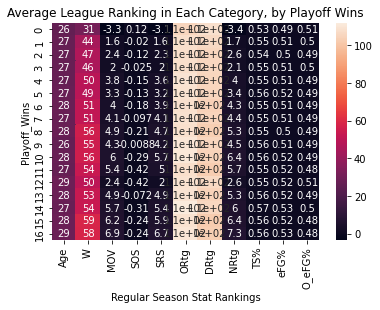

In [63]:
dfs_2003 = dfs.where(dfs.Year >= 2003)

corr_df = dfs_2003.toPandas()[indexes].groupby('Playoff_Wins').mean()
corr_df
plt.title("Average League Ranking in Each Category, by Playoff Wins")
sns.heatmap(data=corr_df,annot=True)
plt.xlabel("Regular Season Stat Rankings")

Afisam corelatia intre coloanele obtinute mai devreme

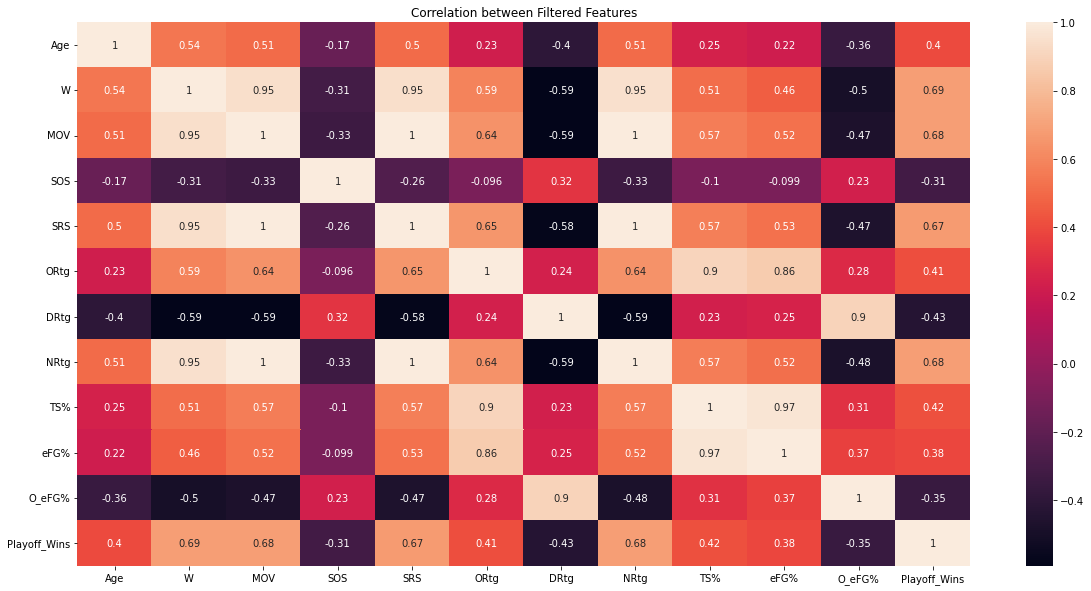

In [64]:
plt.figure(figsize=(20,10))
plt.title("Correlation between Filtered Features")
sns.heatmap(data=dfs_2003.toPandas()[indexes].corr(), annot=True)

Putem observa o corelatie puternica intre SRS si MOV. Acest lucru se datoreaza faptului ca pentru a obtine SRS trebuie sa folosim MOV. Voi utiliza in cele din urma SRS in loc de MOV si SOS, deoarece este o statistica care ilustreaza mai precis diferenta in termeni de puncte fata de restul echipelor din liga. De asemenea, voi utiliza eFG% in loc de TS%.

In cele ce urmeaza vom analiza jocul ofensiv din ultimii 20 de ani si vom observa cum influenteaza echipele care devin campioane. In general, majoritatea echipelor care devin campioane mentin un eFG% in apropiere de 50%, ceea ce ne indica faptul ca aruncarile pe care le produc sunt cat mai bune. O alta statistica care a devenit foarte importanta este 3P%.

[Text(0, 0.5, 'Regular Season League Ranking')]

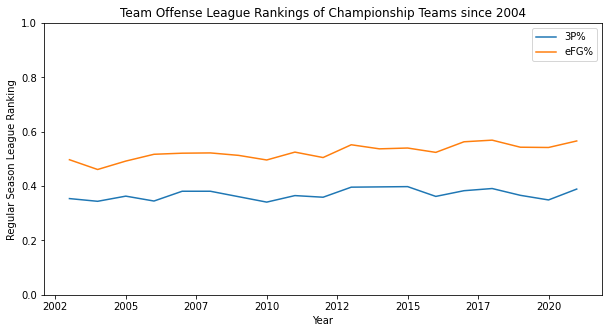

In [65]:
from  matplotlib.ticker import FuncFormatter

chip_years = dfs.where(dfs['Playoff_Wins']==16)
chip_years = chip_years.toPandas()
plt.figure(figsize=(10,5))
plt.title("Team Offense League Rankings of Championship Teams since 2004")
ax = sns.lineplot(x=chip_years['Year'], y=chip_years['3P%'],label="3P%")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
sns.lineplot(x=chip_years['Year'], y=chip_years['eFG%'],label="eFG%")
plt.ylim(0, 1)
ax.set(ylabel="Regular Season League Ranking")

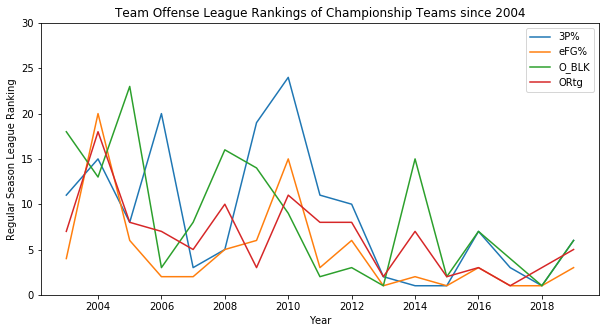

Mai sus putem observa modul in care jocul ofensiv s-a schimbat in ultimii 20 de ani. Jocul ofensiv din 202 pana in 2014 variaza destul de mult in diferite categorii. De exemplu, din 2002 pana in 2014 majoritatea echipelor campioane nu se bazau atat de mult pe aruncarile de 3 puncte, foarte putine echipe fiind in top 5 in aceasta categorie. In anul 2015 echipa Golden State Warriors a revolutionat modul in care se joaca baschetul in NBA, prin jocul lor ultra-ofensiv bazat pe miscarea continua prin pase a mingii si pe aruncarile de 3 puncte. Observam cum de la inceputul lui 2015 incolo, campioanele se claseaza pe pozitii de top in ceea ce priveste jocul ofensiv.

In [66]:
chip_years

,Team,Age,W,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,...,FT/FGA21,O_eFG%,TOV%23,DRB%,FT/FGA25,3P%,DRB,BLK,Playoff_Wins,Year
0,San Antonio Spurs*,28.4,60.0,5.41,0.23,5.65,105.6,99.7,5.9,90.0,...,0.253,0.453,14.2,71.3,0.199,0.354,2556,529,16,2003
1,Detroit Pistons*,27.4,54.0,5.84,-0.81,5.04,102.0,95.4,6.6,87.9,...,0.247,0.441,15.5,71.8,0.202,0.344,2492,570,16,2004
2,San Antonio Spurs*,28.5,59.0,7.80,0.03,7.84,107.5,98.8,8.7,88.9,...,0.238,0.452,14.7,73.6,0.236,0.363,2489,543,16,2005
3,Miami Heat*,29.2,52.0,3.87,-0.27,3.59,108.7,104.5,4.2,91.6,...,0.254,0.477,12.4,76.4,0.251,0.345,2675,442,16,2006
4,San Antonio Spurs*,30.4,58.0,8.43,-0.08,8.35,109.2,99.9,9.3,89.8,...,0.235,0.471,14.0,75.7,0.201,0.381,2577,417,16,2007
5,Boston Celtics*,27.9,66.0,10.26,-0.95,9.30,110.2,98.9,11.3,90.9,...,0.267,0.457,15.2,74.4,0.253,0.381,2615,379,16,2008
6,Los Angeles Lakers*,27.4,65.0,7.66,-0.55,7.11,112.8,104.7,8.1,94.3,...,0.230,0.490,14.2,73.0,0.213,0.361,2587,420,16,2009
7,Los Angeles Lakers*,28.4,57.0,4.72,0.06,4.78,108.8,103.7,5.1,92.8,...,0.221,0.484,13.2,74.4,0.195,0.341,2662,400,16,2010
8,Dallas Mavericks*,30.9,57.0,4.23,0.18,4.41,109.7,105.0,4.7,91.3,...,0.222,0.488,13.0,74.8,0.206,0.365,2618,352,16,2011
9,Miami Heat*,28.3,46.0,5.98,-0.27,5.72,106.6,100.2,6.4,91.2,...,0.238,0.479,15.8,73.9,0.200,0.359,2060,355,16,2012


[Text(0, 0.5, 'Regular Season League Ranking')]

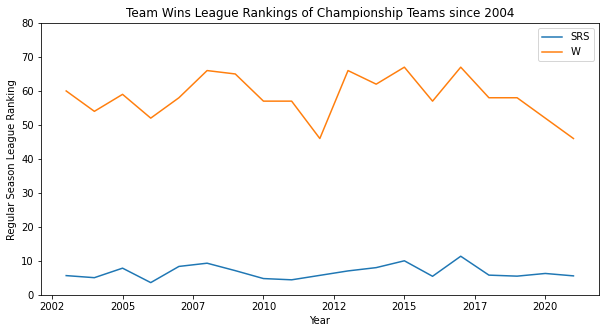

In [67]:
plt.figure(figsize=(10,5))
plt.title("Team Wins League Rankings of Championship Teams since 2004")
ax = sns.lineplot(x=chip_years['Year'], y=chip_years['SRS'],label="SRS")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
ax = sns.lineplot(x=chip_years['Year'], y=chip_years['W'],label="W")

plt.ylim(0, 80)
ax.set(ylabel="Regular Season League Ranking")

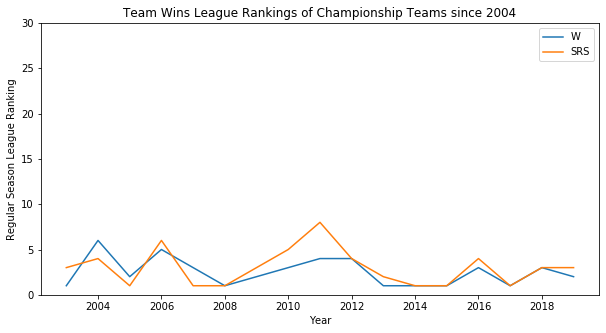

In general numarul de victorii si SRS in sesonul regulat reprezinta niste indicatorii destul de precisi in determinarea campionilor. Dupa cum observam este destul de rar ca echipele care castiga campionatul sa nu se incadreze intre primele 5 echipe in numarul de victorii si SRS.

[Text(0, 0.5, 'Regular Season League Ranking')]

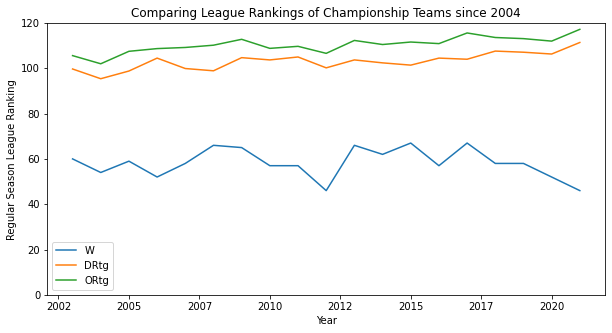

In [68]:
plt.figure(figsize=(10,5))
plt.title("Comparing League Rankings of Championship Teams since 2002")
ax = sns.lineplot(x=chip_years['Year'], y=chip_years['W'],label="W")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
sns.lineplot(x=chip_years['Year'], y=chip_years['DRtg'],label="DRtg")
sns.lineplot(x=chip_years['Year'], y=chip_years['ORtg'],label="ORtg")
plt.ylim(0, 120)
ax.set(ylabel="Regular Season League Ranking")

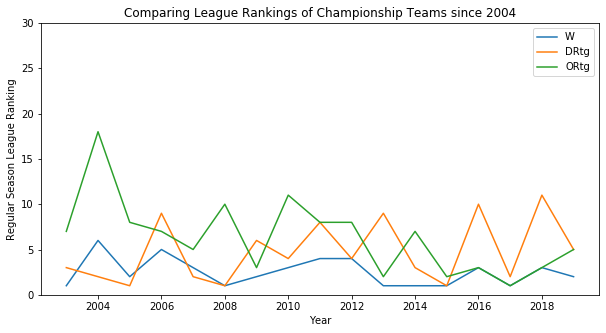

In prima schema observam cum diferenta intre ORtg si DRtg influenteaza numarul de victorii obtinut de echipa. De asemenea, putem observa cum dupa 2010, jocul ofensiv a inceput sa devina mai important decat cel defensiv. 

In [70]:
dfs.show()

+--------------------+----+----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+------+----+--------+------+------+----+--------+-----+----+---+------------+----+
|                Team| Age|   W|  MOV|  SOS|  SRS| ORtg| DRtg|NRtg| Pace|  FTr| 3PAr|  TS%| eFG%|TOV%19|ORB%|FT/FGA21|O_eFG%|TOV%23|DRB%|FT/FGA25|  3P%| DRB|BLK|Playoff_Wins|Year|
+--------------------+----+----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+------+----+--------+------+------+----+--------+-----+----+---+------------+----+
|     Boston Celtics*|27.3|61.0| 7.79|-0.42| 7.37|109.4|101.9| 7.5|102.6|0.332|0.057| 0.55|0.501|  15.4|34.8|   0.258| 0.475|  16.5|67.8|   0.234|0.384|2457|308|           5|1980|
| Los Angeles Lakers*|26.2|60.0|  5.9|-0.51|  5.4|109.5|103.9| 5.6|104.1|0.284|0.014|0.569| 0.53|  16.5|32.6|    0.22| 0.475|  14.0|66.9|   0.181|  0.2|2653|546|          12|1980|
|Seattle SuperSonics*|27.0|56.0| 4.66|-0.42| 4.24|105.8|101.2| 4.6|101.8|0.298|0.025| 0.52|0.474|  1

## Definirea si antrenarea Modeului de ML

In [71]:
dfs_new = dfs

Pentru obtinerea coloanei features pe care o vom folosi in antrenarea modelului, vom scapa mai intai de coloanele neimportante si vom normaliza datele cu ajutorul unui MinMaxScaler. 

In [86]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
import pyspark.sql.functions as F

In [73]:
cols = ("Age", 'NRtg','Pace','FTr','3PAr','TS%', 'TOV%19','ORB%','FT/FGA21', 'TOV%23', 'FT/FGA25', 'Year', 'DRB%','MOV','SOS')

dfs_new = dfs_new.drop(*cols)

cols = dfs_new.columns
cols.remove('Team')
cols.remove('Playoff_Wins')
assembler = VectorAssembler().setInputCols(cols).setOutputCol("features_norm")
scaler = MinMaxScaler(inputCol="features_norm", outputCol="features")
# Pipeline of VectorAssembler and MinMaxScaler
pipeline = Pipeline(stages=[assembler, scaler])

# Fitting pipeline on dataframe
data = pipeline.fit(dfs_new).transform(dfs_new).drop("features_norm")

data.show()

+--------------------+----+-----+-----+-----+-----+------+-----+----+---+------------+--------------------+
|                Team|   W|  SRS| ORtg| DRtg| eFG%|O_eFG%|  3P%| DRB|BLK|Playoff_Wins|            features|
+--------------------+----+-----+-----+-----+-----+------+-----+----+---+------------+--------------------+
|     Boston Celtics*|61.0| 7.37|109.4|101.9|0.501| 0.475|0.384|2457|308|           5|[0.81818181818181...|
| Los Angeles Lakers*|60.0|  5.4|109.5|103.9| 0.53| 0.475|  0.2|2653|546|          12|[0.80303030303030...|
|Seattle SuperSonics*|56.0| 4.24|105.8|101.2|0.474| 0.463|0.312|2550|428|           0|[0.74242424242424...|
| Philadelphia 76ers*|59.0| 4.04|105.0|101.0|0.494|  0.46|0.216|2635|652|          12|[0.78787878787878...|
|    Milwaukee Bucks*|49.0| 3.57|106.8|102.9|0.491| 0.467|0.323|2396|510|           3|[0.63636363636363...|
|       Phoenix Suns*|55.0| 3.25|105.6|102.2|0.498| 0.483|0.243|2458|344|           3|[0.72727272727272...|
|  Kansas City Kings*|47.0| 

In [74]:
cols = ("Age", 'NRtg','Pace','FTr','3PAr','TS%', 'TOV%19','ORB%','FT/FGA21', 'TOV%23', 'FT/FGA25', 'Year', 'DRB%','MOV','SOS')

dfs_pred = dfs_pred.drop(*cols)

cols = dfs_pred.columns
cols.remove('Team')
cols.remove('Playoff_Wins')
assembler = VectorAssembler().setInputCols(cols).setOutputCol("features_norm")
scaler = MinMaxScaler(inputCol="features_norm", outputCol="features")
# Pipeline of VectorAssembler and MinMaxScaler
pipeline = Pipeline(stages=[assembler, scaler])

# Fitting pipeline on dataframe
data_pred = pipeline.fit(dfs_pred).transform(dfs_pred).drop("features_norm")

data_pred.show()


+--------------------+----+-----+-----+-----+-----+------+-----+----+---+------------+--------------------+
|                Team|   W|  SRS| ORtg| DRtg| eFG%|O_eFG%|  3P%| DRB|BLK|Playoff_Wins|            features|
+--------------------+----+-----+-----+-----+-----+------+-----+----+---+------------+--------------------+
|     Boston Celtics*|51.0| 7.02|114.4|106.9|0.542| 0.502|0.356|2915|478|           0|[0.70454545454545...|
|       Phoenix Suns*|64.0| 6.94|114.8|107.3|0.549|  0.51|0.364|2913|359|           0|[1.0,0.9948619139...|
|          Utah Jazz*|49.0| 5.67|116.7|110.5|0.555| 0.521| 0.36|2916|402|           0|[0.65909090909090...|
|  Memphis Grizzlies*|56.0| 5.37|114.6|109.0|0.522| 0.523|0.353|2873|533|           0|[0.81818181818181...|
|Golden State Warr...|53.0| 5.52|112.5|106.9|0.552| 0.509|0.364|2930|372|           0|[0.75,0.903660886...|
|         Miami Heat*|53.0| 4.23|113.7|109.1|0.547| 0.524|0.379|2778|265|           0|[0.75,0.820809248...|
|   Dallas Mavericks*|52.0| 

In [75]:
data.columns

['Team',
 'W',
 'SRS',
 'ORtg',
 'DRtg',
 'eFG%',
 'O_eFG%',
 '3P%',
 'DRB',
 'BLK',
 'Playoff_Wins',
 'features']

In [76]:
train_data = data.select("Team", "features", "Playoff_Wins")
train_data.show()

+--------------------+--------------------+------------+
|                Team|            features|Playoff_Wins|
+--------------------+--------------------+------------+
|     Boston Celtics*|[0.81818181818181...|           5|
| Los Angeles Lakers*|[0.80303030303030...|          12|
|Seattle SuperSonics*|[0.74242424242424...|           0|
| Philadelphia 76ers*|[0.78787878787878...|          12|
|    Milwaukee Bucks*|[0.63636363636363...|           3|
|       Phoenix Suns*|[0.72727272727272...|           3|
|  Kansas City Kings*|[0.60606060606060...|           1|
|      Atlanta Hawks*|[0.65151515151515...|           1|
| Cleveland Cavaliers|[0.45454545454545...|           0|
|    Houston Rockets*|[0.51515151515151...|           2|
|  San Antonio Spurs*|[0.51515151515151...|           1|
|      Indiana Pacers|[0.45454545454545...|           0|
|Portland Trail Bl...|[0.46969696969696...|           1|
|     New Jersey Nets|[0.40909090909090...|           0|
|     New York Knicks|[0.484848

In [77]:
test_data = data_pred.select("Team", "features", "Playoff_Wins")
test_data.show()

+--------------------+--------------------+------------+
|                Team|            features|Playoff_Wins|
+--------------------+--------------------+------------+
|     Boston Celtics*|[0.70454545454545...|           0|
|       Phoenix Suns*|[1.0,0.9948619139...|           0|
|          Utah Jazz*|[0.65909090909090...|           0|
|  Memphis Grizzlies*|[0.81818181818181...|           0|
|Golden State Warr...|[0.75,0.903660886...|           0|
|         Miami Heat*|[0.75,0.820809248...|           0|
|   Dallas Mavericks*|[0.72727272727272...|           0|
|    Milwaukee Bucks*|[0.70454545454545...|           0|
| Philadelphia 76ers*|[0.70454545454545...|           0|
|Minnesota Timberw...|[0.59090909090909...|           0|
|     Denver Nuggets*|[0.63636363636363...|           0|
|    Toronto Raptors*|[0.63636363636363...|           0|
| Cleveland Cavaliers|[0.54545454545454...|           0|
|      Atlanta Hawks*|[0.52272727272727...|           0|
|      Brooklyn Nets*|[0.545454

Am decis sa utilizez un model de Linear Regression pentru determinarea numarului de victorii in playoff.

In [78]:
from pyspark.ml.regression import LinearRegression
# Creăm un obiect de tip LinearRegression
lr = LinearRegression(labelCol='Playoff_Wins')

In [79]:
# Antenați modelul
#lrModel = 
lrModel = lr.fit(train_data)

In [80]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [10.412228810709975,-14.21549754634008,12.474725848542759,-13.364063839227537,6.336512943088272,-3.3376646915720505,0.20192367723657356,-2.291270308299794,-0.19477892241524472] Intercept: 5.514313751999575


In [81]:
#Evaluați modelul
test_results = lrModel.evaluate(test_data)

In [84]:
# Afișați informații obținute în urma evaluării
print("MAE: {}".format(test_results.meanAbsoluteError))

MAE: 6.291028519141601


In [83]:
unlabeled_data=test_data.select("Team", "features")
predictions = lrModel.transform(unlabeled_data)
predictions = predictions.sort(F.desc("prediction"))
predictions.show()

+--------------------+--------------------+------------------+
|                Team|            features|        prediction|
+--------------------+--------------------+------------------+
|       Phoenix Suns*|[1.0,0.9948619139...|15.201791708567693|
|Golden State Warr...|[0.75,0.903660886...|12.327838494154602|
|     Boston Celtics*|[0.70454545454545...|  11.8032110411309|
|         Miami Heat*|[0.75,0.820809248...|11.481449164204932|
|          Utah Jazz*|[0.65909090909090...|10.382716540011312|
|   Dallas Mavericks*|[0.72727272727272...|10.100767095301336|
|  Memphis Grizzlies*|[0.81818181818181...| 8.827939112345295|
| Philadelphia 76ers*|[0.70454545454545...| 8.590906864268659|
|     Denver Nuggets*|[0.63636363636363...| 8.491045318398482|
| Cleveland Cavaliers|[0.54545454545454...| 7.830147608735311|
|    Milwaukee Bucks*|[0.70454545454545...| 7.537482237069559|
|Minnesota Timberw...|[0.59090909090909...| 7.322401817866745|
|      Brooklyn Nets*|[0.54545454545454...| 6.568343533

Dupa cum putem observa, modelul spune ca echipa cu cele mai mari sanse la castigarea campionatului este Pheonix Suns. In cele din urma, echipa care a castigat campionatul anul acesta a fost Golden State Warriors, echipa de pe locul 2 prezisa de modelul nostru.